In [72]:
# Install required module (if not exists)
import sys
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [73]:
# Import required libraries in this lab
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Datascience Lab 9**

## Lab 9-1: Data inspection (1 point)

For this assignment, you will be working with a dataset called `Titanic.csv`. This dataset contains information about the passengers on the Titanic, including their age, gender, and passenger class.


### Reference
* https://pandas.pydata.org/docs/reference/api/pandas.unique.html
* https://pandas.pydata.org/docs/reference/api/pandas.describe.html

In [74]:
### -------- LAB 9-1 START -------- ###
# 1. Load the dataset into a Pandas DataFrame using the read_csv() function.
df = pd.read_csv('Titanic.csv') # 같은 경로에 있을 시
# WRITE YOUR CODE HERE

In [75]:
# Inspect the data with 'head()', 'tail()', 'describe()' etc.
df.head(5)
# WRITE YOUR CODE HERE

,Unnamed: 0,Name,PClass,Age,Sex,Survived,SexCode
0,1,"Allen, Miss Elisabeth Walton",1st,29.00,female,1,1
1,2,"Allison, Miss Helen Loraine",1st,2.00,female,0,1
2,3,"Allison, Mr Hudson Joshua Creighton",1st,30.00,male,0,0
3,4,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.00,female,0,1
4,5,"Allison, Master Hudson Trevor",1st,0.92,male,1,0


In [76]:
# WRITE YOUR CODE HERE
df.describe()

,Unnamed: 0,Age,Survived,SexCode
count,1313.000000,756.000000,1313.000000,1313.000000
mean,657.000000,30.397989,0.342727,0.351866
std,379.174762,14.259049,0.474802,0.477734
min,1.000000,0.170000,0.000000,0.000000
25%,329.000000,21.000000,0.000000,0.000000
50%,657.000000,28.000000,0.000000,0.000000
75%,985.000000,39.000000,1.000000,1.000000
max,1313.000000,71.000000,1.000000,1.000000


In [77]:
# Print the unique values of the 'Sex' and 'PClass' columns using the unique() function
# You'll need to inspect wheather there's any abnormal data.
# For example, you'll find a row with PClass="*", which is not one of 1st, 2nd, and 3rd.
print(df['Sex'].unique())
print(df['PClass'].unique())
# ['female' 'male']
# ['1st' '2nd' '*' '3rd']

['female' 'male']
['1st' '2nd' '*' '3rd']


In [78]:
# Now Filter out the rows where the 'PClass' column has a value of '*'.
# WRITE YOUR CODE HERE
df = df[df['PClass'] != '*']
# '*'이 아닌 PClass만 남겨진 df
df
### -------- LAB 9-1 END ---------- ###

,Unnamed: 0,Name,PClass,Age,Sex,Survived,SexCode
0,1,"Allen, Miss Elisabeth Walton",1st,29.00,female,1,1
1,2,"Allison, Miss Helen Loraine",1st,2.00,female,0,1
2,3,"Allison, Mr Hudson Joshua Creighton",1st,30.00,male,0,0
3,4,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.00,female,0,1
4,5,"Allison, Master Hudson Trevor",1st,0.92,male,1,0
...,...,...,...,...,...,...,...
1308,1309,"Zakarian, Mr Artun",3rd,27.00,male,0,0
1309,1310,"Zakarian, Mr Maprieder",3rd,26.00,male,0,0
1310,1311,"Zenni, Mr Philip",3rd,22.00,male,0,0
1311,1312,"Lievens, Mr Rene",3rd,24.00,male,0,0


## Lab 9-2: Data aggrigation by pivot table

### Task
Your task is to create a pivot table with `Sex` as the columns and `PClass` as the rows, using the count of `Survived` column as the value being aggregated.

To complete this task, you will need to perform the following steps:

1. Use the filtered Titanic dataframe from the previous Lab 9-1.
1. Use the pivot_table() function to create a pivot table with the following parameters:
 * index: Set to 'PClass' to use the passenger class as the rows of the pivot table.
 * columns: Set to 'Sex' to use the sex of the passengers as the columns of the pivot table.
 * values: Set to 'Survived' to use the 'Survived' column as the values being aggregated in the pivot table.
 * aggfunc: Set to 'count' to count the number of survivors by sex and passenger class.
1. Store the pivot table in a new variable called pivot.
1. Print the pivot table to the console

### Reference
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pivot_table.html

In [79]:
### -------- LAB 9-2 START -------- ###
# WRITE YOUR CODE HERE
pivot = pd.pivot_table(df, index='PClass', columns='Sex', values='Survived', aggfunc='count')
pivot
### -------- LAB 9-2 END ---------- ###

Sex,female,male
PClass,,
1st,143,179
2nd,107,172
3rd,212,499


## Lab 9-3: Wide format to long format conversion

Now you have the pivot table in a new variable called `pivot`.
To draw a groupd bar graph, you'll need to convert the wide format table to a long format table.

To complete this task, you will need to perform the following steps:

1. Use the `reset_index()` function to move the 'PClass' column from the index to a regular column.
1. Use the `melt()` function to reshape the pivot table to long format, with `PClass` as the `id_var`, `Sex` as the `var_name`, and `Count` as the `value_name` for the counts of survivors.
1. Store the melted DataFrame in a new variable called `pivot_melted`.

### Reference
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.melt.html

In [80]:
### -------- LAB 9-3 START -------- ###
# WRITE YOUR CODE HERE
pivot = pivot.reset_index()
pivot_melted = pd.melt(pivot, id_vars='PClass', value_vars=['female', 'male'], var_name='Sex', value_name='Count')
pivot_melted
### -------- LAB 9-3 END ---------- ###

,PClass,Sex,Count
0,1st,female,143
1,2nd,female,107
2,3rd,female,212
3,1st,male,179
4,2nd,male,172
5,3rd,male,499


## Lab 9-4: Plotting groupped bar graph
Now we'll draw a groupd bar graph from `pivot_melted`. that you created in the previous step.

To draw the grouped bar graph, we'll use the `Seaborn` library `catplot`. 

1. Create a grouped bar graph using the catplot() function from Seaborn. Pass `pivot_melted` as the data source, with `x='PClass'` to set the passenger class as the x-axis, `y='Count'` to set the number of survivors as the y-axis, `hue='Sex'` to group the bars by `Sex`, `kind='bar'` to indicate that we want a bar graph. Adjust `height` and `aspect` values to make the plot beautiful.
1. Set the plot title and axis labels using the `title()`, `xlabel()`, and `ylabel()` functions from Matplotlib.
1. Display the plot using the show() function from Matplotlib.


### Reference
* https://seaborn.pydata.org/generated/seaborn.catplot.html
* https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.title.html
* https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlabel.html
* https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ylabel.html

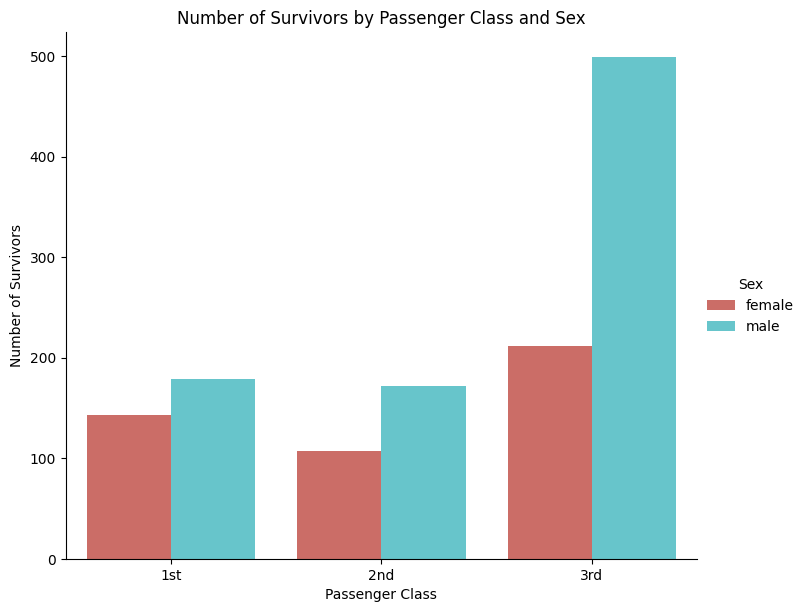

In [81]:
### -------- LAB 9-4 START -------- ###
# Create a grouped bar graph using the sns.catplot() function
# WRITE YOUR CODE HERE
sns.catplot(data=pivot_melted, x='PClass', y='Count', hue='Sex', kind='bar', height=6, aspect=1.2, palette='hls')
# Set the plot title and axis labels
# WRITE YOUR CODE HERE
plt.title('Number of Survivors by Passenger Class and Sex')
plt.xlabel('Passenger Class')
plt.ylabel('Number of Survivors')
# Display the plot
plt.show()
### -------- LAB 9-4 END ---------- ###

## 번외

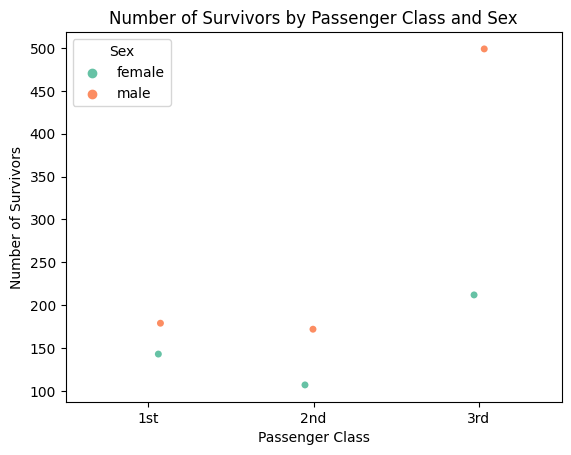

In [82]:
sns.stripplot(data=pivot_melted, x='PClass', y='Count', hue='Sex', palette='Set2')

plt.title('Number of Survivors by Passenger Class and Sex')
plt.xlabel('Passenger Class')
plt.ylabel('Number of Survivors')

plt.show()


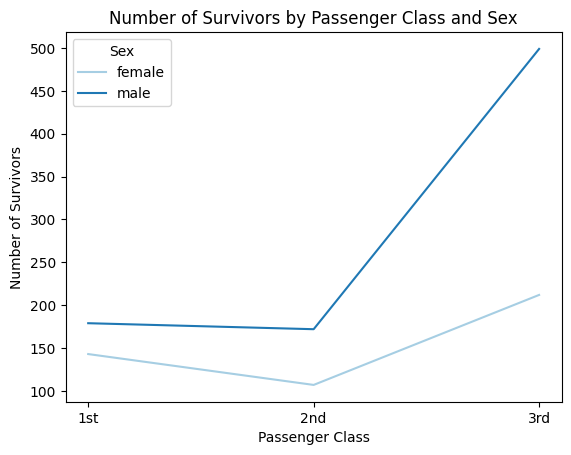

In [83]:
sns.lineplot(data=pivot_melted, x='PClass', y='Count', hue='Sex', palette='Paired')

plt.title('Number of Survivors by Passenger Class and Sex')
plt.xlabel('Passenger Class')
plt.ylabel('Number of Survivors')

plt.show()


In [84]:
message = "Thank you! I love DataScience!"
message

'Thank you! I love DataScience!'